In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(33.53504939299491, 99.794900167879),
 (83.52161487066547, -152.28747462022918),
 (-75.82139829570403, 134.54357990007082),
 (-67.98047570815093, -103.89103740609593),
 (-78.94588551496476, 160.45096003405405),
 (-45.83184045680062, 136.07019329680332),
 (1.7642710118802825, 127.3887269945676),
 (89.65165308938569, 104.44723515894822),
 (37.12825008417224, -179.22565148685783),
 (-39.67766897610607, -154.9675358341441),
 (82.7582854666991, -21.952215326830526),
 (-9.997080502638866, -61.09160393912117),
 (2.7516463332167262, 7.9828292744646205),
 (-6.723359927427566, -176.26089517891378),
 (-73.99165857758615, -159.164417831504),
 (5.038098292170531, 13.355131376058921),
 (-8.570134342173276, -12.105227995067821),
 (-79.84669098432656, 113.59978740001162),
 (-87.28484119077838, 42.562827261344154),
 (-40.06685897548471, -122.13326833983143),
 (14.74731641728205, -71.01814644090267),
 (5.109320762874674, -123.13631811293052),
 (-60.45711124156916, -129.1706149218279),
 (49.909042394294

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
import requests
requests.__version__

'2.25.1'

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=547809bee7050beab2af47737494a954


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xining
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | ternate
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | aripuana
Processing Record 13 of Set 1 | luba
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | bertoua
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | oranjestad
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 

Processing Record 35 of Set 4 | ossora
Processing Record 36 of Set 4 | rudnogorsk
Processing Record 37 of Set 4 | turukhansk
Processing Record 38 of Set 4 | chebsara
Processing Record 39 of Set 4 | quatre cocos
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | mamontovo
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | port hawkesbury
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | broome
Processing Record 48 of Set 4 | uyuni
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | glendive
Processing Record 3 of Set 5 | buala
Processing Record 4 of Set 5 | hilo
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | halalo
City not found. Skipping...
Processing Record 7 of Set 5 | nana

Processing Record 26 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 28 of Set 8 | suntar
Processing Record 29 of Set 8 | kieta
Processing Record 30 of Set 8 | samusu
City not found. Skipping...
Processing Record 31 of Set 8 | mocambique
City not found. Skipping...
Processing Record 32 of Set 8 | port hardy
Processing Record 33 of Set 8 | labutta
City not found. Skipping...
Processing Record 34 of Set 8 | oskemen
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | kruisfontein
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | galle
Processing Record 39 of Set 8 | jiujiang
Processing Record 40 of Set 8 | cockburn town
Processing Record 41 of Set 8 | biak
Processing Record 42 of Set 8 | tayu
Processing Record 43 of Set 8 | rassvet
Processing Record 44 of Set 8 | angoram
Processing Record 45 of Set 8 | kuche
City not found. Skip

Processing Record 11 of Set 12 | san juan bautista
Processing Record 12 of Set 12 | qasigiannguit
Processing Record 13 of Set 12 | pucallpa
Processing Record 14 of Set 12 | husum
Processing Record 15 of Set 12 | babanusah
City not found. Skipping...
Processing Record 16 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 17 of Set 12 | timiryazevskiy
Processing Record 18 of Set 12 | solnechnyy
Processing Record 19 of Set 12 | arkhangelos
City not found. Skipping...
Processing Record 20 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 21 of Set 12 | marsh harbour
Processing Record 22 of Set 12 | zeya
Processing Record 23 of Set 12 | balkanabat
Processing Record 24 of Set 12 | rong kwang
Processing Record 25 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 26 of Set 12 | severo-yeniseyskiy
Processing Record 27 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 28 of Set 12 | tekax
City not found. Skipping...
Proc

In [10]:
len(city_data)

547

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xining,36.6167,101.7667,55.47,81,36,2.44,CN,2021-07-17 21:13:11
1,Barrow,71.2906,-156.7887,53.62,93,90,17.27,US,2021-07-17 21:09:21
2,New Norfolk,-42.7826,147.0587,48.58,72,74,3.00,AU,2021-07-17 21:09:37
3,Punta Arenas,-53.1500,-70.9167,39.31,81,75,12.66,CL,2021-07-17 21:09:10
4,Bluff,-46.6000,168.3333,43.81,82,100,10.27,NZ,2021-07-17 21:09:14
5,Mount Gambier,-37.8333,140.7667,47.37,83,96,5.57,AU,2021-07-17 21:14:55
6,Ternate,0.8000,127.4000,78.66,88,100,14.99,ID,2021-07-17 21:09:24
7,Khatanga,71.9667,102.5000,54.55,74,64,5.08,RU,2021-07-17 21:14:56
8,Kapaa,22.0752,-159.3190,83.19,77,75,3.00,US,2021-07-17 21:09:51
9,Mataura,-46.1927,168.8643,43.48,94,98,2.64,NZ,2021-07-17 21:09:14


In [12]:
# Rearrange Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Xining,CN,2021-07-17 21:13:11,36.6167,101.7667,55.47,81,36,2.44
1,Barrow,US,2021-07-17 21:09:21,71.2906,-156.7887,53.62,93,90,17.27
2,New Norfolk,AU,2021-07-17 21:09:37,-42.7826,147.0587,48.58,72,74,3.00
3,Punta Arenas,CL,2021-07-17 21:09:10,-53.1500,-70.9167,39.31,81,75,12.66
4,Bluff,NZ,2021-07-17 21:09:14,-46.6000,168.3333,43.81,82,100,10.27
...,...,...,...,...,...,...,...,...,...
542,Gat,IL,2021-07-17 21:17:34,31.6100,34.7642,84.40,66,0,5.68
543,Den Chai,TH,2021-07-17 21:17:34,17.9837,100.0522,74.03,98,97,1.88
544,Soe,ID,2021-07-17 21:17:34,-9.8607,124.2840,60.13,70,36,3.11
545,Comodoro Rivadavia,AR,2021-07-17 21:06:53,-45.8667,-67.5000,48.06,61,0,1.14


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

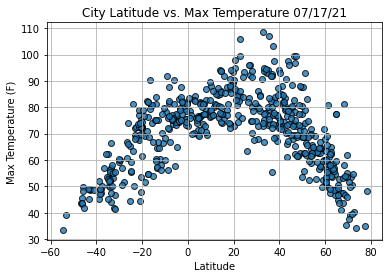

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

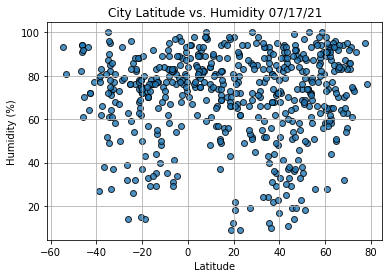

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

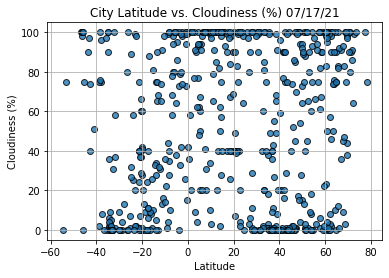

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

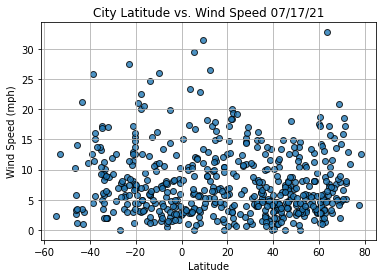

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

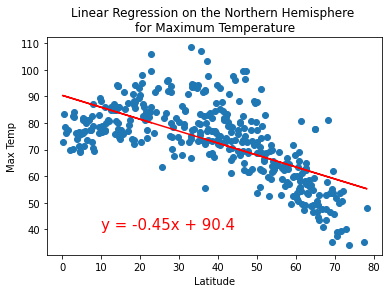

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere 
for Maximum Temperature""", 'Max Temp',(10,40))

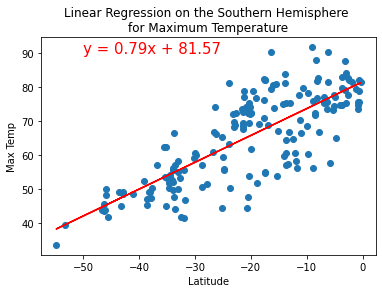

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere 
for Maximum Temperature""", 'Max Temp',(-50,90))

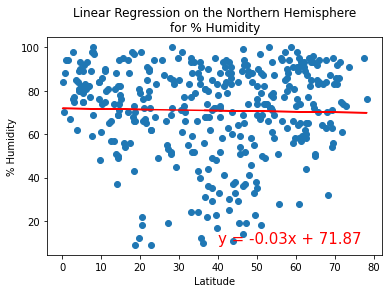

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere
for % Humidity""", '% Humidity',(40,10))

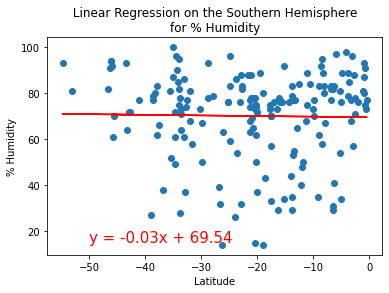

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      """ Linear Regression on the Southern Hemisphere 
for % Humidity""", '% Humidity',(-50,15))

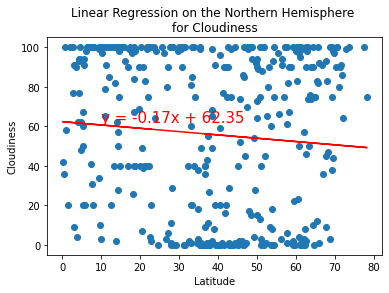

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere 
for Cloudiness""", 'Cloudiness',(10,65))

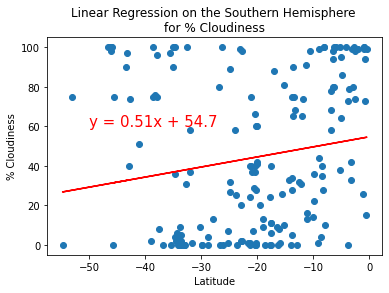

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere 
for % Cloudiness''', '% Cloudiness',(-50,60))

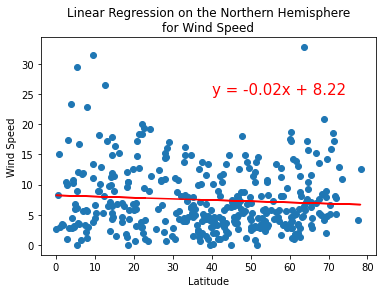

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere
for Wind Speed''', 'Wind Speed',(40,25))

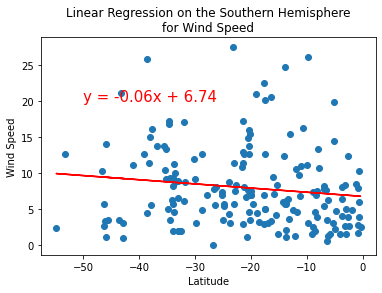

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
for Wind Speed''', 'Wind Speed',(-50,20))